##### Import required modules and functions

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

##### Visualisation of example images

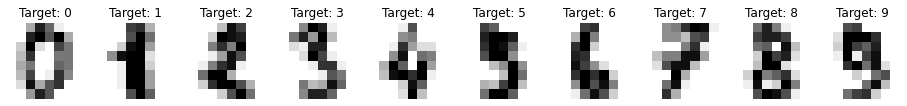

In [10]:
digits = load_digits()

# visualise some representative sample images, labelled according to their target output
_, axes = mpl.subplots(nrows=1, ncols=10, figsize=(16, 3))
for ax, image, label in zip(axes, digits.images, digits.target): # construct tuples of plot axes, image data, and target data
    ax.set_axis_off()  # remove axes of each subplot
    ax.imshow(image, cmap=mpl.cm.gray_r) # applies an inverse (_r) greyscale colour-map to each image
    ax.set_title(f'Target: {label}')

##### Construct a dataframe from the image data, and an array of the target data

In [11]:
data = pd.DataFrame(digits.data) # predictor data, each 8x8 px image is constructed from 64 numeric values
tar = digits.target # predicted data, the digit to be interpreted from each image
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


##### Split the data into training and testing sets

In [12]:
# split the data into training and testing sets; predictors are the pixel values, target output is the digit to be identified.
X_train, X_test, Y_train, Y_test = train_test_split(
    data,  # the complete dataframe
    tar,  # digit values to be predicted
    test_size=0.25,  # percentage of total samples to be allocated to the testing set
    random_state=16  # set a random seed to ensure results are reproducible
)

X_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1093,0.0,0.0,0.0,7.0,11.0,0.0,0.0,0.0,0.0,0.0,...,14.0,2.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0
408,0.0,0.0,9.0,11.0,2.0,0.0,0.0,0.0,0.0,8.0,...,15.0,0.0,0.0,0.0,7.0,9.0,9.0,12.0,4.0,0.0
1519,0.0,0.0,0.0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,1.0,8.0,16.0,15.0,2.0,0.0
1741,0.0,0.0,3.0,10.0,16.0,12.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,13.0,10.0,1.0,0.0,0.0
1611,0.0,0.0,10.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,0.0,0.0,0.0,14.0,14.0,1.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,12.0,16.0,14.0,1.0,0.0
581,0.0,0.0,0.0,10.0,16.0,6.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,8.0,16.0,15.0,1.0,0.0
121,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,13.0,0.0,0.0,0.0
1262,0.0,2.0,14.0,16.0,16.0,7.0,0.0,0.0,0.0,6.0,...,2.0,0.0,0.0,1.0,14.0,16.0,16.0,6.0,0.0,0.0


##### Define the model parameters, train and test

In [13]:
model = RandomForestClassifier(  # set the parameters of the Random Forest model to be applied to dataset
    n_estimators=20,  # number of trees to generate in the forest
    criterion='gini',  # quality of node splitting is determined by Gini impurity (default), or information gain: criterion='entropy'
    max_features='auto'  # number of features (pixels) to consider when splitting nodes, 'auto' == 'sqrt' (default)
)

model.fit(X_train, Y_train)  # train the RF model on the training data
print(model.score(X_test, Y_test) )  # returns the mean classification accuracy of the test data compared to the test target data
Y_pred = model.predict(X_test)

0.9688888888888889


In [14]:
# generate a dictionary of incorrect test predictions: {key : value} = {target digit : number of misclassifications}
miss = {i : np.bincount(Y_test[Y_pred != Y_test]).tolist()[i] for i in range(10) }
print(miss)
print(max(miss, key=miss.get))  # return the digit which is most frequently misclassified

{0: 0, 1: 0, 2: 1, 3: 0, 4: 1, 5: 3, 6: 0, 7: 1, 8: 6, 9: 2}
8


##### Visualise the model's classification accuracy

Text(69.0, 0.5, 'Predicted')

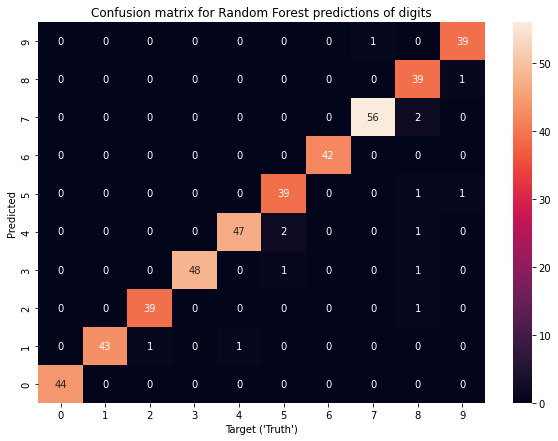

In [16]:
# generate a heatmap representation of the RF confusion matrix
mpl.figure(figsize=(10,7))
hm = sb.heatmap(np.transpose(confusion_matrix(Y_test, Y_pred) ), annot=True)
hm.invert_yaxis()
mpl.title('Confusion matrix for Random Forest predictions of digits')
mpl.xlabel('Target (\'Truth\')')
mpl.ylabel('Predicted')

##### Attempt to improve classification using Adaptive Boosting (AdaBoost) 

In [17]:
from sklearn.ensemble import AdaBoostClassifier

In [18]:
model_AB = AdaBoostClassifier( # 320 stumps, 2.4 rate --> 0.8822 accuracy
    base_estimator=None,  # classifier type, 'None' defaults to decision trees with max_depth = 1 ('stumps')
    n_estimators=320,  # number of classifiers (stumps) / weak learners to be trained 
    learning_rate = 2.4,  # weight applied to each learner at each boosting iteration
    random_state=6  # set a random seed to ensure results are reproducible
)

model_AB.fit(X_train, Y_train)  # train the learners on the training data, implementing the AdaBoost algorithm
print(model_AB.score(X_test, Y_test) )  # returns the mean classification accuracy of the test data compared to the test target data
Y_pred_AB = model_AB.predict(X_test)

0.8822222222222222


In [19]:
# generate a dictionary of incorrect test predictions: {key : value} = {target digit : number of misclassifications}
miss_AB = {i : np.bincount(Y_test[Y_pred_AB != Y_test]).tolist()[i] for i in range(10) }
print(miss_AB)
print(max(miss_AB, key=miss_AB.get))  # return the digit which is most frequently misclassified by the weak learners

{0: 2, 1: 8, 2: 9, 3: 5, 4: 7, 5: 3, 6: 1, 7: 10, 8: 4, 9: 4}
7


Text(69.0, 0.5, 'Predicted')

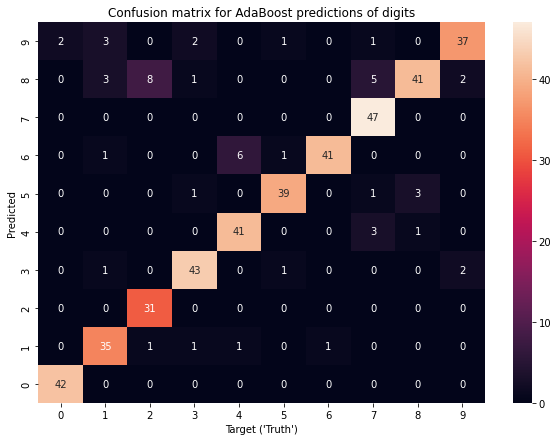

In [20]:
# generate a heatmap representation of the AdaBoost confusion matrix
mpl.figure(figsize=(10,7))
hm_AB = sb.heatmap(np.transpose(confusion_matrix(Y_test, Y_pred_AB) ), annot=True)
hm_AB.invert_yaxis()
mpl.title('Confusion matrix for AdaBoost predictions of digits')
mpl.xlabel('Target (\'Truth\')')
mpl.ylabel('Predicted')

###### Ideally, implementation of the AdaBoost algorithm would be optimised by choosing number of estimators and learning rate which maximise predicted classification accuracy.